---
### Traditional Machine Learning
We will build and train multiple machine learning models using scikit-learn and pyspark to test, which is the best. We will use the following models:
- Logistic Regression
- Naive Bayes
- XGBoost
- Support Vector Machine
- Gradient boosting
- Ada Boost

In [1]:
import torch

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        print(f'Using device: {torch.cuda.get_device_name(0)}')
        return torch.device('cuda')
    elif torch.backends.mps.is_available():
        print('Using device: Apple ARM GPU')
        return torch.device('mps')
    else:
        print('Using device: CPU')
        return torch.device('cpu')
    
# Set the device
device = get_default_device()
print(f'Using device: {device}')

Using device: NVIDIA GeForce RTX 3060
Using device: cuda


In [2]:
from modules.data_preprocessing import DataPreprocessing
from modules.sentiment_analysis import SentimentAnalysis

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


---

## Data Preprocessing

---

In [3]:
data_preprocessing = DataPreprocessing(
	data_path_1='data/1_Restaurants.csv',
	data_path_2='data/2_Reviews.csv',
	preprocessed_data_path='data/preprocessed_data.csv',
	ready_data_path='data/ready_data.csv'
)

In [4]:
df = data_preprocessing.data_preparation()

In [5]:
# Pandas save to csv produce NaN values, so we will remove them
df = df[df['Comment'].notna()]

In [6]:
df.isnull().sum()

ID                  0
User                0
ReviewTime          0
Rating              0
Comment             0
IDRestaurant        0
Restaurant          0
Address             0
OpeningTime     17970
District            0
ReviewCount         0
ClosingTime     17970
MaxPrice            0
MinPrice            0
dtype: int64

In [7]:
df

,ID,User,ReviewTime,Rating,Comment,IDRestaurant,Restaurant,Address,OpeningTime,District,ReviewCount,ClosingTime,MaxPrice,MinPrice
0,1,PHAN LE,2023-12-20 21:13:00,5.2,gà chiên còn sống tanh khủng_khiếp,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00,Quận 1,100,23:59,200000.0,50000.0
1,2,Thúy,2023-09-25 15:43:00,5.0,đã ăn_quả rồi ăn_ok ạ,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00,Quận 1,100,23:59,200000.0,50000.0
2,3,Quyên Quyên,2023-06-24 11:11:00,5.0,đã thử ngon,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00,Quận 1,100,23:59,200000.0,50000.0
3,4,Phương Thảo,2022-12-22 14:58:00,1.0,tệ mua mang về cho 1 gói tương_ớt xin thêm khô...,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00,Quận 1,100,23:59,200000.0,50000.0
4,5,Quỳnh Nguyễn,2022-09-23 22:40:00,4.2,21 h302 đứa nhỏ kêu đói sau 1 hồi bình_loạn ch...,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00,Quận 1,100,23:59,200000.0,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28649,29955,Trannuhamy,2020-10-26 12:16:00,7.0,đặt bún_thái này trong chương_trình của coca t...,1595,Tiên Tiên - Bún Thái Cay - Tân Chánh Hiệp 16,"52/4A Tân Chánh Hiệp 16, P. Tân Chánh Hiệp (Đầ...",06:00,Quận 12,1,23:30,200000.0,25000.0
28650,29956,Phương,2021-06-01 15:34:00,10.0,bánh ngon nóng giao hàng nhanh giá phải_chăng ...,1609,"3 Râu - Gà Rán, Pizza & Trà Sữa - 107 Nguyễn V...","107 Nguyễn Văn Quá, P. Đông Hưng Thuận, Quận 1...",09:00,Quận 12,3,23:59,120000.0,12000.0
28651,29957,Tú,2021-01-31 14:29:00,3.4,phục_vụ tệ pizza_xúc xích gấp đôi phô mái khôn...,1609,"3 Râu - Gà Rán, Pizza & Trà Sữa - 107 Nguyễn V...","107 Nguyễn Văn Quá, P. Đông Hưng Thuận, Quận 1...",09:00,Quận 12,3,23:59,120000.0,12000.0
28652,29958,Hoàng Hậu Mai,2020-10-27 18:06:00,7.6,đang thèm gà rán thì lướt trúng ngày kết_hợp g...,1609,"3 Râu - Gà Rán, Pizza & Trà Sữa - 107 Nguyễn V...","107 Nguyễn Văn Quá, P. Đông Hưng Thuận, Quận 1...",09:00,Quận 12,3,23:59,120000.0,12000.0


---

## Traditional Machine Learning

---

In [8]:
sentiment_analysis = SentimentAnalysis()

In [9]:
traditional_ml_report = sentiment_analysis.train_traditional_ml(df)
traditional_ml_report

 17%|█▋        | 1/6 [00:00<00:00,  9.74it/s]

Model logistic_regression already trained. Loading...
Model naive_bayes already trained. Loading...


 50%|█████     | 3/6 [00:00<00:00,  7.71it/s]

Model xgboost already trained. Loading...
Model svm already trained. Loading...


 83%|████████▎ | 5/6 [00:01<00:00,  2.35it/s]

Model gradient_boosting already trained. Loading...
Model ada_boost already trained. Loading...


100%|██████████| 6/6 [00:01<00:00,  3.08it/s]


,model,accuracy,precision,recall,f1_score,confusion_matrix,classification_report
0,logistic_regression,0.603385,0.618440,0.603385,0.591845,"[[738, 41, 107], [475, 1024, 976], [184, 490, ...","{'0': {'precision': 0.5282748747315676, 'recal..."
1,naive_bayes,0.655034,0.663282,0.655034,0.651356,"[[759, 115, 12], [275, 1703, 497], [120, 958, ...","{'0': {'precision': 0.6577123050259965, 'recal..."
2,xgboost,0.664980,0.664053,0.664980,0.663871,"[[667, 160, 59], [215, 1493, 767], [71, 648, 1...","{'0': {'precision': 0.6998950682056663, 'recal..."
3,svm,0.687489,0.687518,0.687489,0.687454,"[[685, 162, 39], [151, 1600, 724], [38, 677, 1...","{'0': {'precision': 0.7837528604118993, 'recal..."
4,gradient_boosting,0.636189,0.636517,0.636189,0.634386,"[[662, 129, 95], [260, 1396, 819], [125, 657, ...","{'0': {'precision': 0.6322827125119389, 'recal..."
5,ada_boost,0.600244,0.601280,0.600244,0.595754,"[[669, 137, 80], [316, 1205, 954], [157, 647, ...","{'0': {'precision': 0.5858143607705779, 'recal..."


In [10]:
cm = traditional_ml_report[traditional_ml_report['model'] == 'logistic_regression']['confusion_matrix'].values[0]

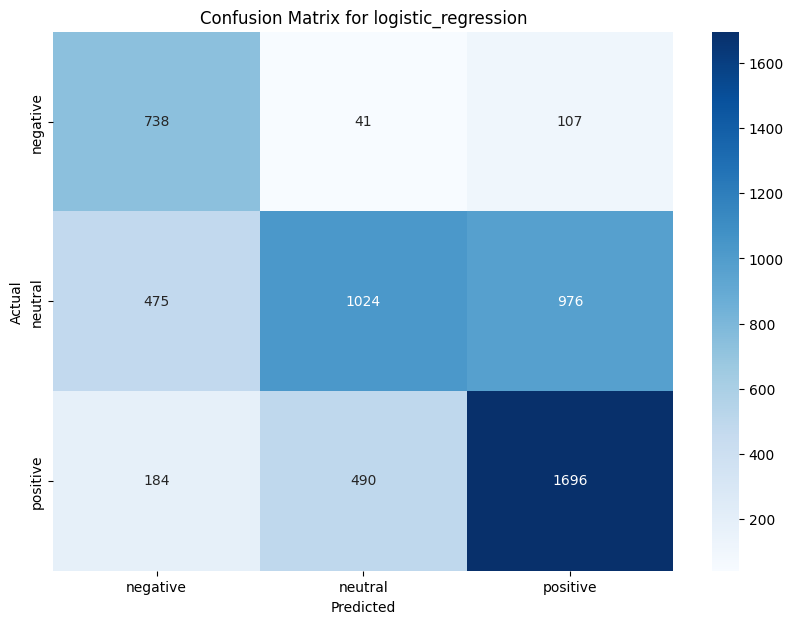

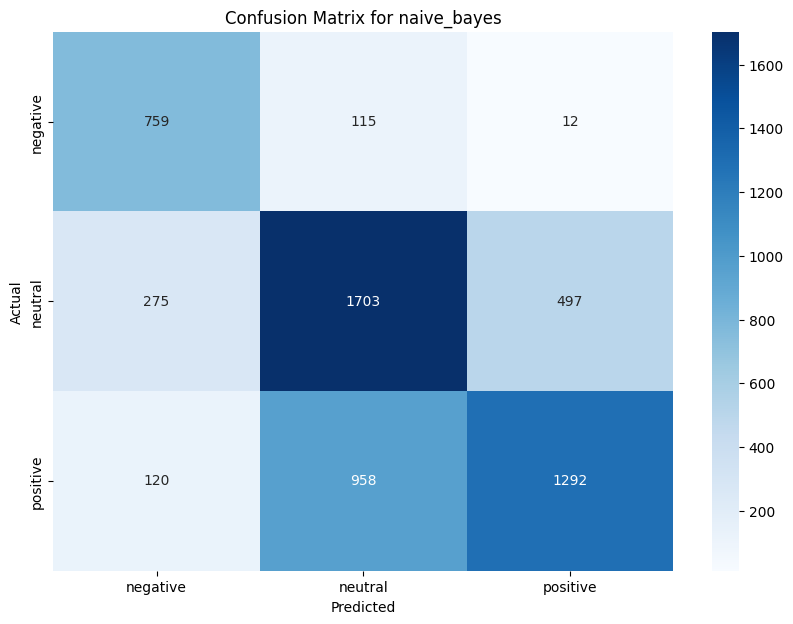

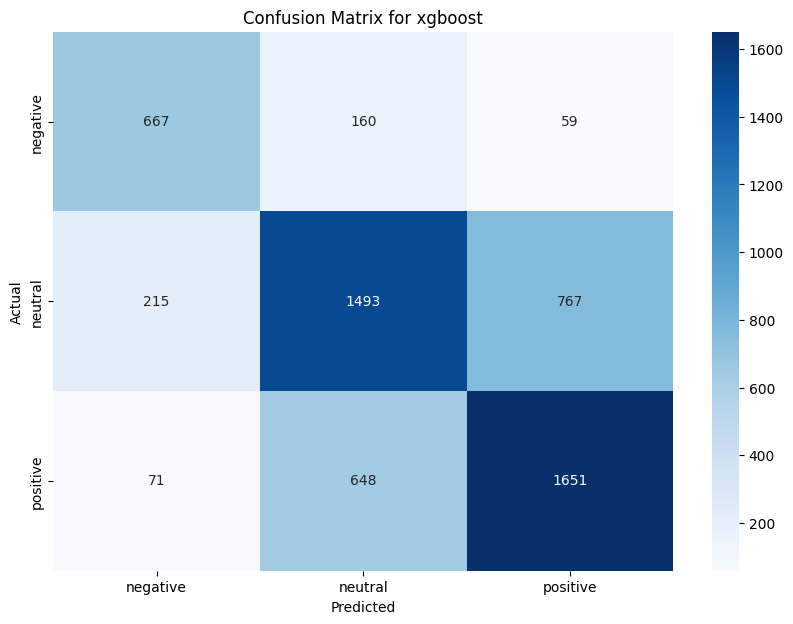

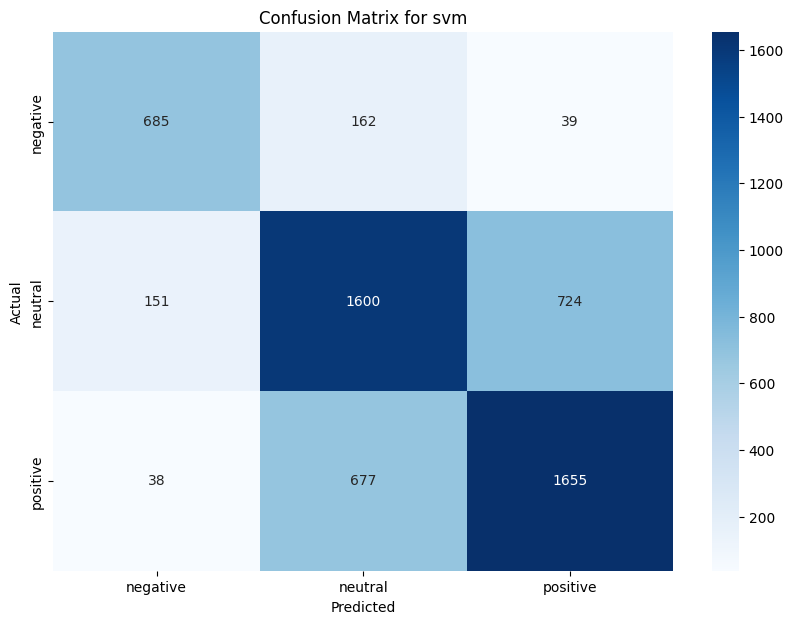

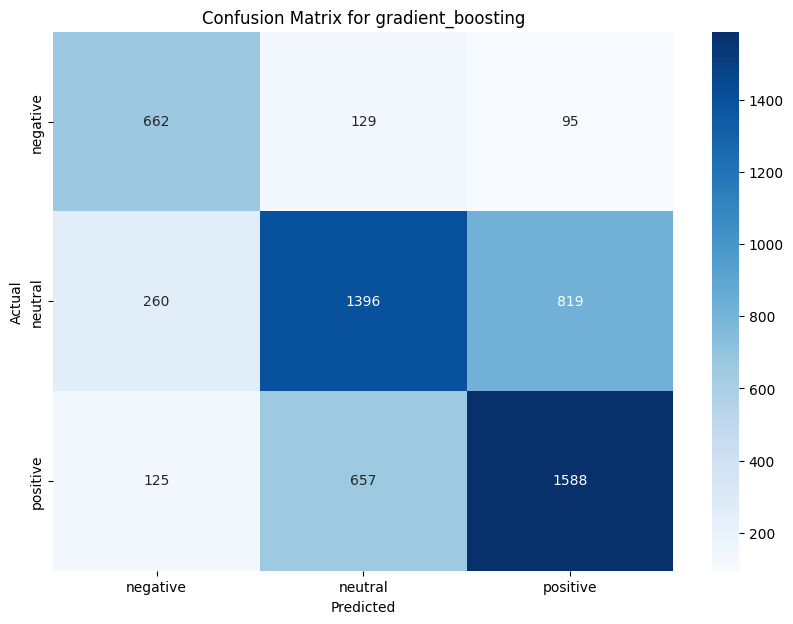

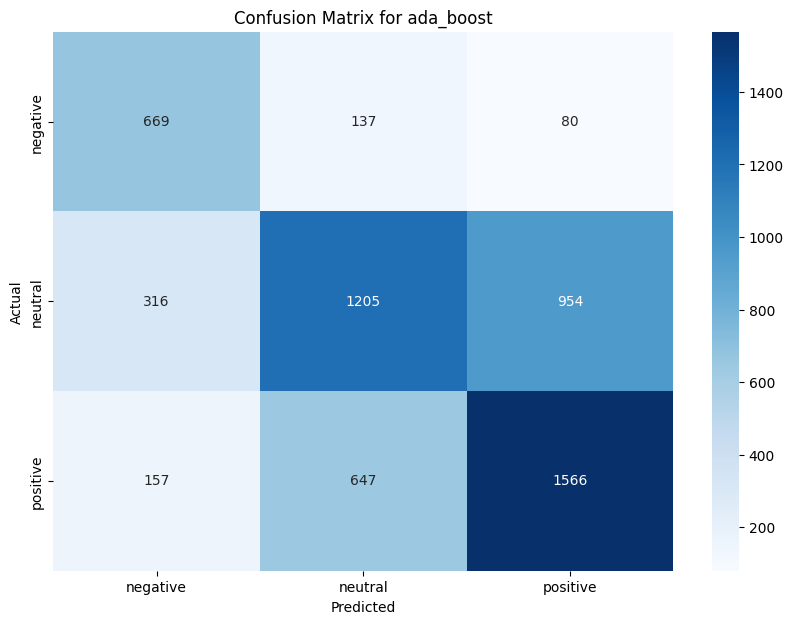

In [11]:
models = traditional_ml_report['model'].unique()

for model in models:
    cm = traditional_ml_report[traditional_ml_report['model'] == model]['confusion_matrix'].values[0]
    sentiment_analysis.plot_confusion_matrix(cm, model)

In [12]:
test = sentiment_analysis.predict_traditional_ml(['Món ăn dở ẹt, đắt nữa mà chán chê, không bao giờ quay lại nữa'])
test

Replacing English words in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 1848.53it/s]


Replacing emojis in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 3771.86it/s]


Replacing teencode in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 7384.34it/s]


Removing weird characters from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 8612.53it/s]


Correcting wrong words in the 'Comment' column...


  0%|          | 0/1 [00:00<?, ?it/s]/mnt/e/Work/Coding/CSC/10_do_an_tot_nghiep/LDS0_K294_Online_VuTrongAn/Project_3/modules/VietnameseOcrCorrection/tool/predictor.py:39: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  return torch.LongTensor(src_text).to(self.device)
100%|██████████| 1/1 [00:00<00:00,  5.96it/s]


Tokenizing the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 10.20it/s]


Removing stopwords from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 4815.50it/s]


Removing punctuation from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 4604.07it/s]


Vietnamese text column handled successfully.
['món ăn dở_ẹt đắt nữa chán_chê không bao_giờ quay lại nữa']


100%|██████████| 6/6 [00:00<00:00, 63389.98it/s]


,model,prediction
0,logistic_regression,negative
1,naive_bayes,negative
2,xgboost,negative
3,svm,neutral
4,gradient_boosting,negative
5,ada_boost,negative


In [13]:
test = sentiment_analysis.predict_traditional_ml(['Quá ngon, giá cả hợp lý, nhân viên thân thiện, sẽ quay lại'])
test

Replacing English words in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 3404.47it/s]


Replacing emojis in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 2968.37it/s]


Replacing teencode in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 8004.40it/s]


Removing weird characters from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 8355.19it/s]


Correcting wrong words in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 11.71it/s]


Tokenizing the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 959.79it/s]


Removing stopwords from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 6502.80it/s]


Removing punctuation from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 5426.01it/s]


Vietnamese text column handled successfully.
['ngon giá_cả hợp_lý nhân_viên thân_thiện sẽ quay lại']


100%|██████████| 6/6 [00:00<00:00, 71902.35it/s]


,model,prediction
0,logistic_regression,positive
1,naive_bayes,positive
2,xgboost,positive
3,svm,positive
4,gradient_boosting,positive
5,ada_boost,positive


In [14]:
test = sentiment_analysis.predict_traditional_ml(['Món ăn bình thường, không thích nhân viên cho lắm, bác bảo vệ quất tiền xe 500k, không bao giờ quay lại'])
test

Replacing English words in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 3968.12it/s]


Replacing emojis in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 2861.05it/s]


Replacing teencode in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 5377.31it/s]


Removing weird characters from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 7639.90it/s]


Correcting wrong words in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 10.39it/s]


Tokenizing the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 720.79it/s]


Removing stopwords from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 7738.57it/s]


Removing punctuation from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 6990.51it/s]


Vietnamese text column handled successfully.
['món ăn bình_thường không thích nhân_viên cho lắm bác bảo_vệ quất tiền xe 500 k không bao_giờ quay lại']


100%|██████████| 6/6 [00:00<00:00, 132451.71it/s]


,model,prediction
0,logistic_regression,negative
1,naive_bayes,negative
2,xgboost,negative
3,svm,neutral
4,gradient_boosting,negative
5,ada_boost,negative


In [15]:
test = sentiment_analysis.predict_traditional_ml(['Cơm gà xối mỡ vệ sinh, giá rẻ, phuục vụ tốt, sẽ quay lại'])
test

Replacing English words in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 6069.90it/s]


Replacing emojis in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 3934.62it/s]


Replacing teencode in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 7626.01it/s]


Removing weird characters from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 8388.61it/s]


Correcting wrong words in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 16.64it/s]


Tokenizing the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 790.48it/s]


Removing stopwords from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 3869.28it/s]


Removing punctuation from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 4021.38it/s]


Vietnamese text column handled successfully.
['cơm gà xối mỡ vệ_sinh giá rẻ phuục vụ tốt sẽ quay lại']


100%|██████████| 6/6 [00:00<00:00, 131072.00it/s]


,model,prediction
0,logistic_regression,positive
1,naive_bayes,negative
2,xgboost,positive
3,svm,neutral
4,gradient_boosting,positive
5,ada_boost,positive


In [16]:
test = sentiment_analysis.predict_traditional_ml(['đồ ăn bình thường, tất cả đều bình thường'])
test

Replacing English words in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 5924.16it/s]


Replacing emojis in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 4152.78it/s]


Replacing teencode in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 7796.10it/s]


Removing weird characters from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 7037.42it/s]


Correcting wrong words in the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 12.83it/s]


Tokenizing the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 1540.32it/s]


Removing stopwords from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 7738.57it/s]


Removing punctuation from the 'Comment' column...


100%|██████████| 1/1 [00:00<00:00, 3647.22it/s]


Vietnamese text column handled successfully.
['đồ_ăn bình_thường tất_cả đều bình_thường']


100%|██████████| 6/6 [00:00<00:00, 144631.17it/s]


,model,prediction
0,logistic_regression,positive
1,naive_bayes,negative
2,xgboost,neutral
3,svm,positive
4,gradient_boosting,positive
5,ada_boost,positive
